# XGBoost Classifier

## Whole dataset

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
cleaned_dataset = pd.read_csv('../preparation/dataframes/cleaned_dataset.csv', index_col=0)

def change_outcome(x):
    if x == -1: x = 0
    elif x == 0: x = 1
    else: x = 2
    return x

cleaned_dataset['outcome'] = cleaned_dataset['outcome'].apply(change_outcome)
X = cleaned_dataset.drop('outcome', axis=1)
y = cleaned_dataset['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### Tuning the hyperparameters

In [7]:
estimators_scores_list = []
for i in range(1, 50):
    model = xgb.XGBClassifier(n_estimators=i, max_depth=4, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    estimators_scores_list.append(accuracy_score(y_test, y_pred))

In [11]:
px.line(
    x=range(1, 50),
    y=estimators_scores_list,
    labels={'x': 'No. estimators', 'y': 'Testing accuracy'},
    title='The accuracy score of the XGBoost Classifier as the no. estimators is varied')

In [8]:
max_depth_list = []
for i in range(1, 10):
    model = xgb.XGBClassifier(n_estimators=16, max_depth=i, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    max_depth_list.append(accuracy_score(y_test, y_pred))

In [12]:
px.line(
    x=range(1, 10),
    y=max_depth_list,
    labels={'x': 'No. estimators', 'y': 'Testing accuracy'},
    title='The accuracy score of the XGBoost Classifier as the no. estimators is varied')

In [13]:
learning_rate_list = []
for i in np.arange(0, 5, 0.1):
    model = xgb.XGBClassifier(n_estimators=25, max_depth=5, learning_rate=i, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    learning_rate_list.append(accuracy_score(y_test, y_pred))

In [15]:
px.line(
    x=np.arange(0, 5, 0.1),
    y=learning_rate_list,
    labels={'x': 'Learning rate', 'y': 'Testing accuracy'},
    title='The accuracy score of the XGBoost Classifier as the learning rate is varied')

In [16]:
n_estimators = list(range(20, 41))
max_depth = list(range(3, 8))
learning_rate = np.arange(0.1, 1.1, 0.2)
hyperparameters = dict(
    n_estimators=n_estimators,
    max_depth=max_depth,
    learning_rate=learning_rate)

decision_tree = xgb.XGBClassifier(random_state=13)
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(decision_tree, hyperparameters, cv=kfold)
best_model = clf.fit(X, y)

print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

Best n_estimators: 23
Best max_depth: 4
Best learning_rate: 0.30000000000000004


### Best model

In [17]:
model = xgb.XGBClassifier(
    n_estimators=23,
    max_depth=4,
    learning_rate=0.3,
    random_state=13)

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print(f'Best Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Best Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Best Recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'Best F1: {f1_score(y_test, y_pred, average="macro")}')

Best Accuracy: 0.49604013766223
Best Precision: 0.4474213526928543
Best Recall: 0.39432503303929406
Best F1: 0.33363012547866017


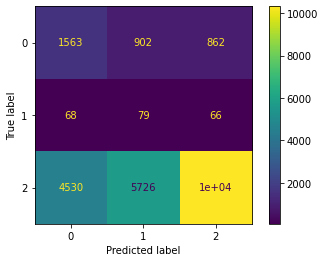

In [19]:
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.show()

## Dataset after 2000

In [19]:
import pandas as pd
cleaned_dataset_2000 = pd.read_csv('../preparation/dataframes/cleaned_dataset_2000.csv', index_col=0)

def change_outcome(x):
    if x == -1: x = 0
    elif x == 0: x = 1
    else: x = 2
    return x

cleaned_dataset_2000['outcome'] = cleaned_dataset_2000['outcome'].apply(change_outcome)
X = cleaned_dataset_2000[['elo_home', 'elo_away']]
y = cleaned_dataset_2000['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [10]:
X

,elo_home,elo_away,average_recent_home_scored,average_recent_home_conceeded,average_recent_away_scored,average_recent_away_conceeded,home_form,away_form
37017,77.0,90.0,1.3,2.1,2.3,1.1,-3.0,2.0
37018,77.0,62.0,0.7,1.3,1.1,1.6,-4.0,-1.0
37019,83.0,81.0,1.2,1.2,1.1,1.3,2.0,0.0
37020,75.0,61.0,0.7,1.4,1.1,3.1,-2.0,-3.0
37021,80.0,78.0,1.7,1.8,1.1,1.5,1.0,-3.0
...,...,...,...,...,...,...,...,...
120576,87.0,86.0,1.9,1.4,1.6,1.4,2.0,-1.0
120577,56.0,84.0,1.0,1.3,2.0,1.1,0.0,4.0
120578,79.0,87.0,1.1,1.4,2.3,1.0,0.0,3.0
120579,56.0,61.0,1.3,1.2,0.8,0.7,-1.0,0.0


In [10]:
n_estimators = list(range(20, 41))
max_depth = list(range(3, 8))
learning_rate = np.arange(0.1, 1.1, 0.2)
hyperparameters = dict(
    n_estimators=n_estimators,
    max_depth=max_depth,
    learning_rate=learning_rate)

decision_tree = xgb.XGBClassifier(random_state=13)
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(decision_tree, hyperparameters, cv=kfold)
best_model = clf.fit(X, y)

print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

Best n_estimators: 37
Best max_depth: 3
Best learning_rate: 0.30000000000000004


In [22]:
n_estimators = list(range(20, 41, 5))
max_depth = list(range(3, 8, 2))
learning_rate = np.arange(0.1, 1.1, 0.2)
hyperparameters = dict(
    n_estimators=n_estimators,
    max_depth=max_depth,
    learning_rate=learning_rate)

decision_tree = xgb.XGBClassifier(random_state=13)
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(decision_tree, hyperparameters, cv=kfold)
best_model = clf.fit(X, y)

print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

Best n_estimators: 35
Best max_depth: 3
Best learning_rate: 0.30000000000000004


In [24]:
model = xgb.XGBClassifier(
    n_estimators=35,
    max_depth=3,
    learning_rate=0.3,
    random_state=13)

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print(f'Best Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Best Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Best Recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'Best F1: {f1_score(y_test, y_pred, average="macro")}')

Best Accuracy: 0.48267815472985104
Best Precision: 0.38097911108184707
Best Recall: 0.39453618261279483
Best F1: 0.32647366694860674
